## Mobile Price Classification

In [126]:
import pandas as pd #mengimport library pandas
import numpy as np #mengimport library numpy
import seaborn as sns #mengimport library seaborn
import matplotlib.pyplot as plt #mengimport library matplotlib.pyplot

In [127]:
df = pd.read_csv('train.csv') #mengimport data train.csv
df.head() #menampilkan 5 baris data teratas 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Exploratory Data Analysis

In [128]:
df.info() #menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Penjelasan :
- battery_power : Total energy a battery can store in one time measured in mAh
- blue : Has bluetooth or not
- clock_speed : speed at which microprocessor executes instructions
- dual_sim : Has dual sim support or not
- fc : Front Camera mega pixels
- four_g : Has 4G or not
- int_memory : Internal Memory in Gigabytes
- m_dep : Mobile Depth in cm
- mobile_wt : Weight of mobile phone
- n_cores : Number of cores of processor
- pc : Primary Camera mega pixels
- px_height : Pixel Resolution Height
- px_width : Pixel Resolution Width
- ram : Random Access Memory in Mega Bytes
- sc_h : Screen Height of mobile in cm
- sc_w : Screen Width of mobile in cm
- talk_time : longest time that a single battery charge will last when you are
- three_g : Has 3G or not
- touch_screen : Has touch screen or not
- wifi : Has wifi or not
- price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [129]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [130]:
categorical_features=list()
numeric_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      categorical_features.append(column_name)
    else:
      numeric_features.append(column_name)

In [131]:
categorical_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [132]:
numeric_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

#### Data Cleansing

In [133]:
#Mengecek apakah ada value yang kosong
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dapat dilihat pada data di atas, bahwa tidak terdapat data yang kosong atau missing value

#### Checking Outliers

In [134]:
#Mengecek outlier
import scipy.stats as stats #mengimport library scipy
df[(np.abs(stats.zscore(df["price_range"])) >= 3)] #Mengecek outliers kolom price_range dari data train.csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [135]:
q1 = df["battery_power"].quantile(0.25)
q3 = df["battery_power"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["battery_power"] < fence_low) | (df["battery_power"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [136]:
#Mengecek outlier kolom clock_speed
q1 = df["clock_speed"].quantile(0.25)
q3 = df["clock_speed"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["clock_speed"] < fence_low) | (df["clock_speed"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [137]:
#Mengecek outlier kolom int_memory
q1 = df["int_memory"].quantile(0.25)
q3 = df["int_memory"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["int_memory"] < fence_low) | (df["int_memory"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [138]:
#Mengecek outlier kolom m_dep
q1 = df["m_dep"].quantile(0.25)
q3 = df["m_dep"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["m_dep"] < fence_low) | (df["m_dep"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [139]:
#Mengecek outlier kolom mobile_wt
q1 = df["mobile_wt"].quantile(0.25)
q3 = df["mobile_wt"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["mobile_wt"] < fence_low) | (df["mobile_wt"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [140]:
#Mengecek outlier kolom n_cores
q1 = df["n_cores"].quantile(0.25)
q3 = df["n_cores"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["n_cores"] < fence_low) | (df["n_cores"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [141]:
#Mengecek outlier kolom pc
q1 = df["pc"].quantile(0.25)
q3 = df["pc"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["pc"] < fence_low) | (df["pc"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [142]:
#Mengecek outlier kolom px_width
q1 = df["px_width"].quantile(0.25)
q3 = df["px_width"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["px_width"] < fence_low) | (df["px_width"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [143]:
#Mengecek outlier kolom ram
q1 = df["ram"].quantile(0.25)
q3 = df["ram"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["ram"] < fence_low) | (df["ram"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [144]:
#Mengecek outlier kolom sc_h
q1 = df["sc_h"].quantile(0.25)
q3 = df["sc_h"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["sc_h"] < fence_low) | (df["sc_h"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [145]:
#Mengecek outlier kolom sc_w
q1 = df["sc_w"].quantile(0.25)
q3 = df["sc_w"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["sc_w"] < fence_low) | (df["sc_w"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [146]:
#Mengecek outlier kolom talk_time
q1 = df["talk_time"].quantile(0.25)
q3 = df["talk_time"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["talk_time"] < fence_low) | (df["talk_time"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [147]:
#Mengecek apakah ada data yang duplikat
df.duplicated().sum()

0

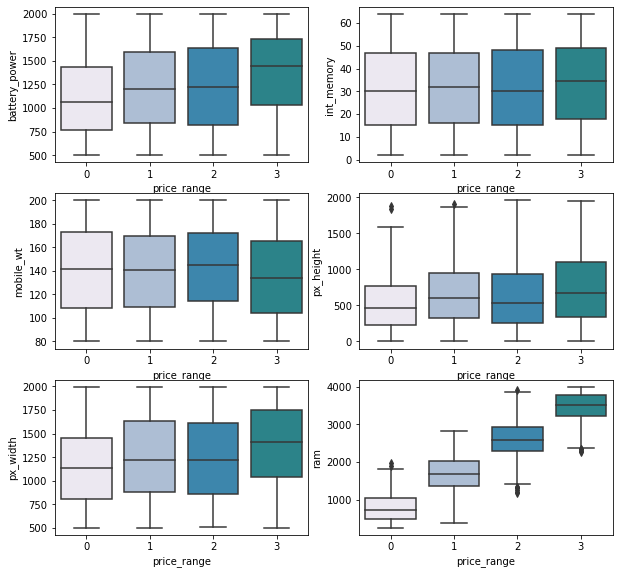

In [148]:
#Analysis to check Outlier in Numeric Features
i = 1
plt.figure(figsize=(10,20))
for feature in numeric_features:
    plt.subplot(6,2,i)
    sns.set_palette("deep")
    sns.boxplot(x='price_range' , y=feature, data=df, palette=["#ece7f2", "#a6bddb", "#2b8cbe", "#1c9099"])
    i+=1

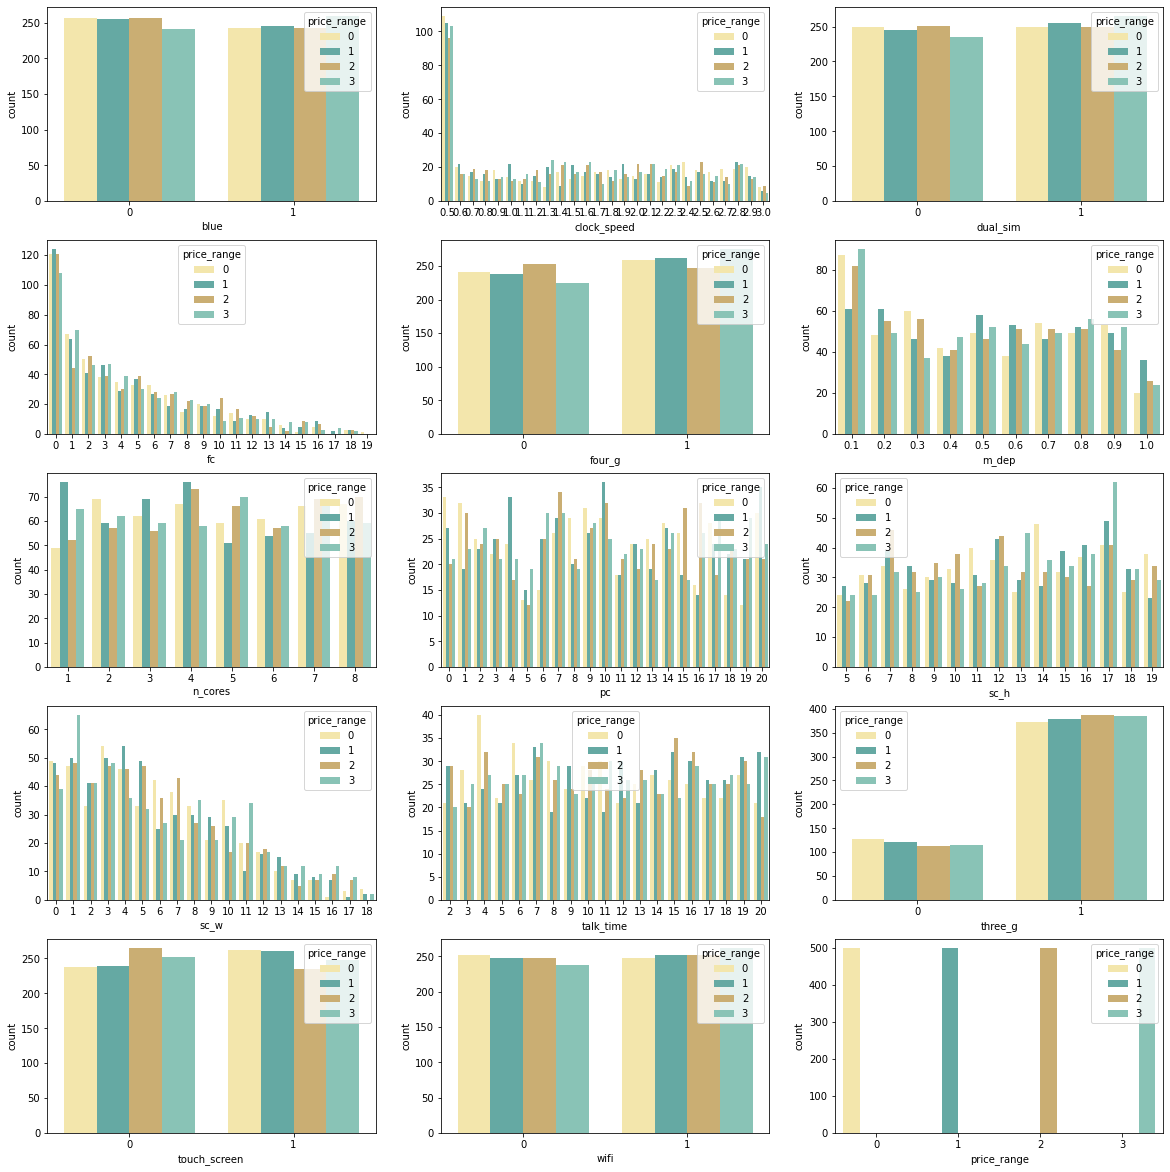

In [149]:
# Analysis to check outlier in categorical values
i = 1
plt.figure(figsize = (20,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.set_palette("deep")
    sns.countplot(x = feature, data = df,hue='price_range', palette=["#ffeda0", "#5ab4ac", "#d8b365", "#7fcdbb"])
    i +=1

#### Data Visualization

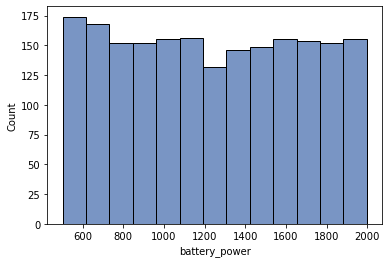

In [150]:
ax = sns.histplot(data = df, x='battery_power') #membuat plot histogram battery_power sepanjang sumbu x
plt.show() #menampilkan visualisasi

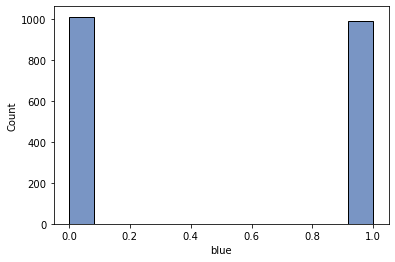

In [151]:
ax = sns.histplot(data = df, x='blue') #membuat plot histogram blue sepanjang sumbu x
plt.show() #menampilkan visualisasi

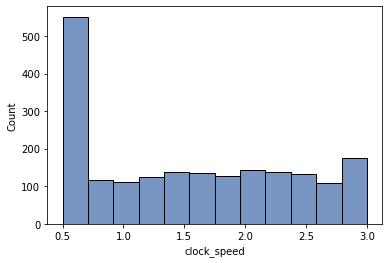

In [152]:
ax = sns.histplot(data = df, x='clock_speed') #membuat plot histogram clock_speed sepanjang sumbu x
plt.show() #menampilkan visualisasi

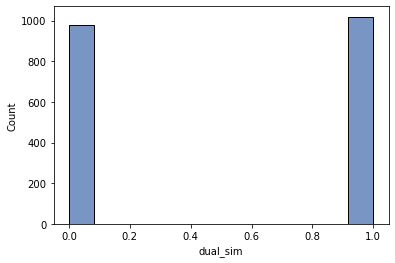

In [153]:
ax = sns.histplot(data = df, x='dual_sim') #membuat plot histogram dual_sim sepanjang sumbu x
plt.show() #menampilkan visualisasi

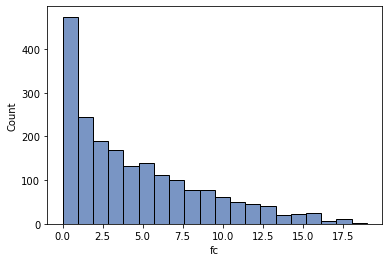

In [154]:
ax = sns.histplot(data = df, x='fc') #membuat plot histogram fc sepanjang sumbu x
plt.show() #menampilkan visualisasi

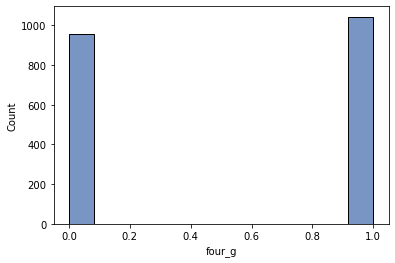

In [155]:
ax = sns.histplot(data = df, x='four_g') #membuat plot histogram four_g sepanjang sumbu x
plt.show() #menampilkan visualisasi

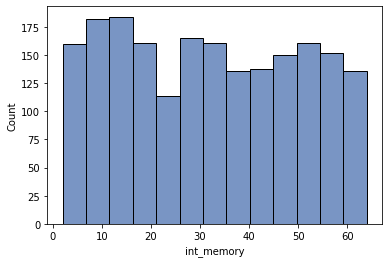

In [156]:
ax = sns.histplot(data = df, x='int_memory') #membuat plot histogram int_memory sepanjang sumbu x
plt.show() #menampilkan visualisasi

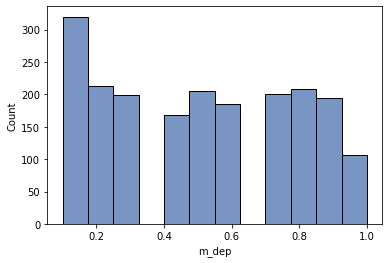

In [157]:
ax = sns.histplot(data = df, x='m_dep') #membuat plot histogram m_dep sepanjang sumbu x
plt.show() #menampilkan visualisasi

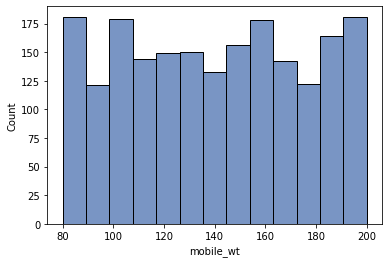

In [158]:
ax = sns.histplot(data = df, x='mobile_wt') #membuat plot histogram mobile_wt sepanjang sumbu x
plt.show() #menampilkan visualisasi

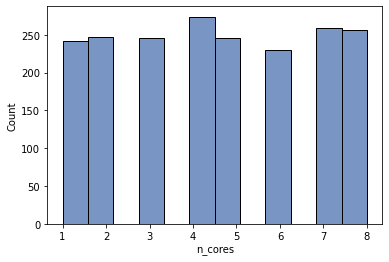

In [159]:
ax = sns.histplot(data = df, x='n_cores') #membuat plot histogram n_cores sepanjang sumbu x
plt.show() #menampilkan visualisasi

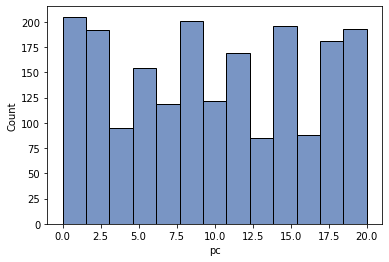

In [160]:
ax = sns.histplot(data = df, x='pc') #membuat plot histogram pc sepanjang sumbu x
plt.show() #menampilkan visualisasi

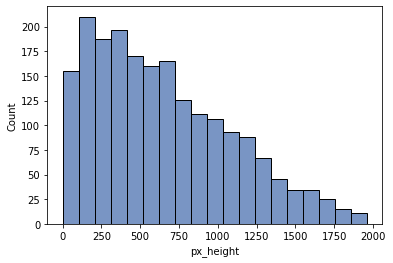

In [161]:
ax = sns.histplot(data = df, x='px_height') #membuat plot histogram px_height sepanjang sumbu x
plt.show() #menampilkan visualisasi

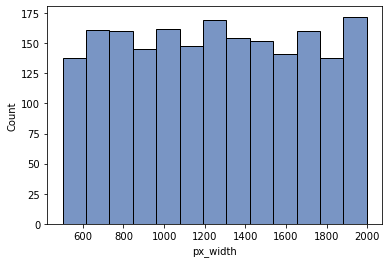

In [162]:
ax = sns.histplot(data = df, x='px_width') #membuat plot histogram px_width sepanjang sumbu x
plt.show() #menampilkan visualisasi

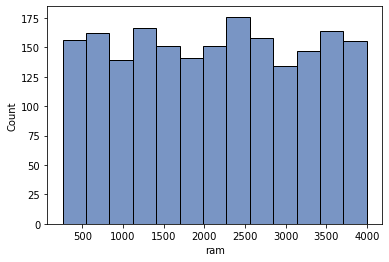

In [163]:
ax = sns.histplot(data = df, x='ram') #membuat plot histogram ram sepanjang sumbu x
plt.show() #menampilkan visualisasi

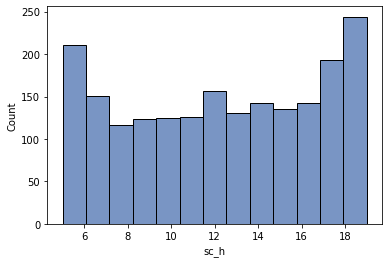

In [164]:
ax = sns.histplot(data = df, x='sc_h') #membuat plot histogram sc_h sepanjang sumbu x
plt.show() #menampilkan visualisasi

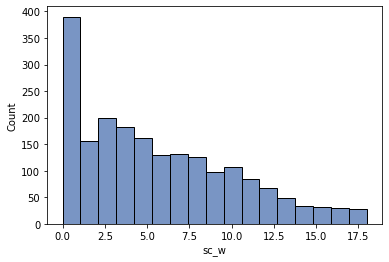

In [165]:
ax = sns.histplot(data = df, x='sc_w') #membuat plot histogram sc_w sepanjang sumbu x
plt.show() #menampilkan visualisasi

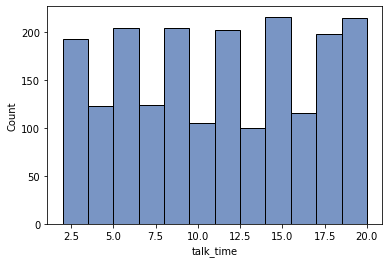

In [166]:
ax = sns.histplot(data = df, x='talk_time') #membuat plot histogram talk_time sepanjang sumbu x
plt.show() #menampilkan visualisasi

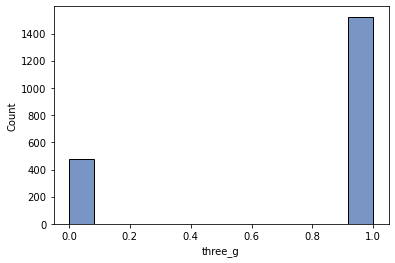

In [167]:
ax = sns.histplot(data = df, x='three_g') #membuat plot histogram three_g sepanjang sumbu x
plt.show() #menampilkan visualisasi

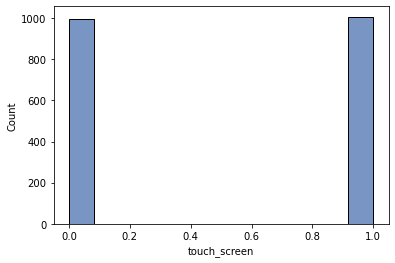

In [168]:
ax = sns.histplot(data = df, x='touch_screen') #membuat plot histogram touch_screen sepanjang sumbu x
plt.show() #menampilkan visualisasi

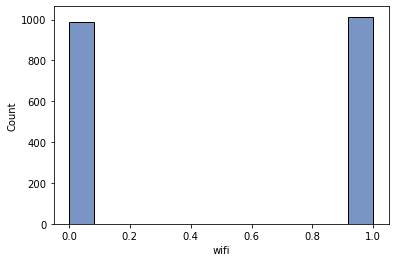

In [169]:
ax = sns.histplot(data = df, x='wifi') #membuat plot histogram wifi sepanjang sumbu x
plt.show() #menampilkan visualisasi

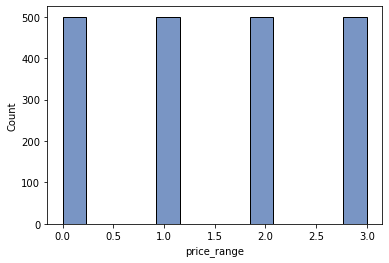

In [170]:
ax = sns.histplot(data = df, x='price_range') #membuat plot histogram price_range sepanjang sumbu x
plt.show() #menampilkan visualisasi

Text(0.5, 1.0, 'Correlation ')

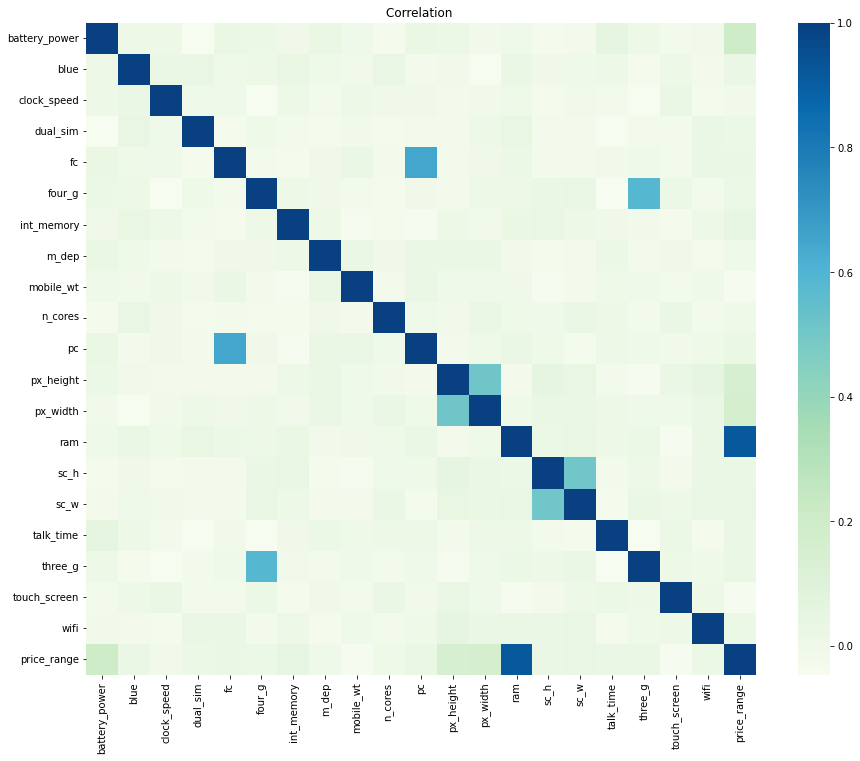

In [186]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='GnBu')
r.set_title("Correlation ")

price_range memiliki korelasi terhadap ram, px_width, px_height,dan battery power

#### Modelling 

In [171]:
# defining feature matrix(X) and response vector(y)
x = df.loc[:, df.columns != 'price_range'] #mendefinisikan x degnan memilih semua kolom kecuali kolom price_range
y = df["price_range"] #mendefinisikan y dengan kolom price-range

In [172]:
# splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split #mengimport library train_test_split dari sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1) 

- x_train : Untuk menampung data source yang akan dilatih.
- x_test : Untuk menampung data target yang akan dilatih.
- y_train : Untuk menampung data source yang akan digunakan untuk testing.
- y_test : Untuk menampung data target yang akan digunakan untuk testing.
- x dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target.
- Parameter test_size digunakan untuk mendefinisikan ukuran data testing. 
- Dalam contoh di atas, test_size=0.4 berarti data yang digunakan sebagai data testing adalah sebesar 40% dari keseluruhan dataset.

In [173]:
# Decision Tree
from sklearn import tree #mengimport library tree dari sklearn
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

Penjelasan kode di atas yaitu membuat model klasifikasi dari data latih dan data uji yang telah ditetapkan menggunakan decision tree. Model klasifikasi disimpan pada atribut dtree.

In [174]:
#Build a text report showing the rules of a decision tree.
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_13 <= 2460.50
|   |--- feature_13 <= 1177.00
|   |   |--- feature_11 <= 1231.50
|   |   |   |--- feature_0 <= 1767.50
|   |   |   |   |--- feature_13 <= 1067.00
|   |   |   |   |   |--- feature_6 <= 63.50
|   |   |   |   |   |   |--- feature_13 <= 835.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  835.50
|   |   |   |   |   |   |   |--- feature_12 <= 1816.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 1096.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1632.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  1632.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.80
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.80
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_11 >  1096.00
|   |   |   |   |   |   |   |   |   |--- class:

In [175]:
#Hyperparameter Tuning for random forest
from sklearn.ensemble import RandomForestClassifier #mengimpor library RandomForestClassifier dari sklearn.ensemble

rf = RandomForestClassifier(random_state=42, n_jobs=-1) #mendefinisikan variabel rf dengan menggunakan fungsi RandomForestClassifier dengan random_state=42, random_state adalah pembuat angka acak dan n_jobs=-1, n_jobs adalah Jumlah pekerjaan yang harus dijalankan secara paralel untuk kecocokan dan prediksi 

params = {
    'max_depth': [2,3,5,10,20], #Kedalaman maksimum pohon
    'min_samples_leaf': [5,10,20,50,100,200], #Jumlah minimum sampel yang diperlukan untuk berada di simpul daun‎
    'n_estimators': [10,25,30,50,100,200] #Jumlah pohon di hutan
}

In [176]:
from sklearn.model_selection import GridSearchCV #mengimpor GridSearchCV dari sklearn.model_selection

#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, #This is assumed to implement the scikit-learn estimator interface.
                           param_grid=params, #Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
                           cv = 4, #Determines the cross-validation splitting strategy
                           n_jobs=-1, #Number of jobs to run in parallel
                           verbose=1, #Controls the verbosity: the higher, the more messages.
                           scoring="accuracy") #Strategy to evaluate the performance of the cross-validated model on the test set

grid_search.fit(x_train, y_train) #Run fit with all sets of parameters

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [177]:
grid_search.best_score_ #Score of best_estimator on the left out data

0.8666666666666667

0.8666666666666667 merupakan hasil dari kombinasi dari hyperparameter yang digunakan pada model RandomForest

In [178]:
rf_best = grid_search.best_estimator_ #Estimator that was chosen by the search
rf_best.fit(x_train, y_train) #Run fit with all sets of parameters.

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [179]:
#Support Vector Machine
from sklearn import svm #mengimport svm dari sklearn
clf = svm.SVC() #mendefinisikan clf sebagai model SVM
clf = clf.fit(x_train, y_train) #membuat model SVM nya terhadap Training set

#### Evaluation

In [180]:
y_svm = clf.predict(x_test) #mendefinisikan objek y_svm sebagai hasil prediksi dari model svm yang dibuat ke test set
y_dtree = dtree.predict(x_test) #mendefinisikan objek y_dtree sebagai hasil prediksi dari model decision treee yang dibuat ke test set
y_rf = rf_best.predict(x_test) #mendefinisikan objek y_rf sebagai hasil prediksi dari model decision treee yang dibuat ke test set

In [181]:
from sklearn.metrics import accuracy_score #mengimport accuracy_score dari sklearn.metrics
print(accuracy_score(y_test, y_dtree)) 
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_svm))

0.8225
0.855
0.94625


Accuracy classification score

Dalam klasifikasi multilabel, fungsi ini menghitung akurasi subset: kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label yang sesuai dalam y_test. Dari skor akurasi di atas diperoleh : 
- 0.81 untuk Decision Tree
- 0.855 untuk Random Forest
- 0.94625 untuk Support Vector Machine

Jadi, Support Vector machine merupakan model yang memiliki nilai tertinggi pada evaluasi dengan accurary_score

In [182]:
from sklearn.metrics import precision_score #mengimport precision_score dari sklearn.metrics
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))
print(precision_score(y_test, y_svm, average='macro'))

0.8286373501993196
0.8560119887647354
0.9465286835864329


Compute the precision

Presisi adalah rasio tp / (tp + fp) di mana tp adalah jumlah positif benar dan fp jumlah positif palsu. Presisi secara intuitif adalah kemampuan pengklasifikasi untuk tidak memberi label positif pada sampel yang negatif.

Nilai terbaik adalah 1 dan nilai terburuk adalah 0. Dari skor di atas diperoleh :
- 0.8120835300627489 untuk Decision Tree
- 0.8560119887647354 untuk Random Forest
- 0.9465286835864329 untuk Support Vector Machine

Jadi, Support Vector machine merupakan model yang memiliki nilai terbaik dikarenakan nilainya mendekati 1 pada evaluasi menggunakan precision_score

In [183]:
from sklearn.metrics import recall_score #mengimport recall_score dari sklearn.metrics
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))
print(recall_score(y_test, y_svm, average='macro'))

0.8244565217391304
0.8589783706631532
0.9487675669740887


Compute the recall

Penarikan kembali adalah rasio tp / (tp + fn) di mana tp adalah jumlah positif benar dan fn jumlah negatif palsu. Penarikan kembali secara intuitif adalah kemampuan pengklasifikasi untuk menemukan semua sampel positif.

Nilai terbaik adalah 1 dan nilai terburuk adalah 0. Dari skor di atas diperoleh :
- 0.8083552920509443 untuk Decision Tree
- 0.8589783706631532 untuk Random Forest
- 0.9487675669740887 untuk Support Vector Machine

Jadi, Support Vector machine merupakan model yang memiliki nilai terbaik dikarenakan nilainya mendekati 1 pada evaluasi menggunakan recall_score

In [184]:
from sklearn.metrics import confusion_matrix #mengimport confusion_matrix dari sklearn.metrics
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_svm))

[[156  28   0   0]
 [ 15 162  21   0]
 [  0  27 169  24]
 [  0   0  27 171]]
[[171  13   0   0]
 [ 21 163  14   0]
 [  0  33 167  20]
 [  0   0  15 183]]
[[183   1   0   0]
 [  7 187   4   0]
 [  0  11 195  14]
 [  0   0   6 192]]


Compute confusion matrix to evaluate the accuracy of a classification

Menurut definisi matriks konfusi C sedemikian rupa sehingga Ci,j sama dengan jumlah pengamatan yang diketahui berada di grup i dan diprediksi berada di grup j.

Jadi dalam klasifikasi biner, jumlah negatif benar adalah C0,0, negatif palsu adalah C1,0, positif benar adalah C1,1 dan positif palsu adalah C0,1.

In [185]:
from sklearn.metrics import classification_report #mengimport classification_report dari sklearn.metrics
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       184
           1       0.75      0.82      0.78       198
           2       0.78      0.77      0.77       220
           3       0.88      0.86      0.87       198

    accuracy                           0.82       800
   macro avg       0.83      0.82      0.83       800
weighted avg       0.83      0.82      0.82       800

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       184
           1       0.78      0.82      0.80       198
           2       0.85      0.76      0.80       220
           3       0.90      0.92      0.91       198

    accuracy                           0.85       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.85      0.85       800

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       184
           1       0.

Classification Report

Build a text report showing the main classification metrics

Dari hasil model yang telah dibuat, dapat disimpulkan bahwa ada beberapa faktor yang memengaruhi price_range pada smartphone, yaitu:

- battery_power
- int_memory
- px_height
- px_width
- ram